In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# get class names
class_path = '/content/drive/MyDrive/traffic_Data/labels.csv'
classes = pd.read_csv(class_path)
class_names = list(classes['Name'])
print(class_names)

['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Speed limit (30km/h)', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'speed limit (80km/h)', 'Dont Go straight or left', 'Dont Go straight or Right', 'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car', 'No horn', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Go straight or right', 'Go straight', 'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right', 'Roundabout mandatory', 'watch out for cars', 'Horn', 'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals', 'Danger Ahead', 'Zebra Crossing', 'Bicycles crossing', 'Children crossing', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight', 'Go left or straight', 'Unknown4', 'ZigZag Curve', 'Train Crossing', 'Under Construction', 'Unknown5', 'Fences', 'Heavy Vehicle Accidents'

In [ ]:
data_dir = '/content/drive/MyDrive/traffic_Data/DATA'
num_images = pd.DataFrame(class_names, columns=['label'])

In [ ]:
count = []
for dir in os.listdir(data_dir):
    count.append(len(os.listdir(data_dir + '/' + dir)))
num_images['count'] = count
num_images.head()

,label,count
0,Speed limit (5km/h),80
1,Speed limit (15km/h),12
2,Speed limit (30km/h),194
3,Speed limit (40km/h),42
4,Speed limit (50km/h),128


In [ ]:
num_images.label.value_counts()

Speed limit (40km/h)            2
Speed limit (50km/h)            2
Bicycles crossing               2
Speed limit (30km/h)            1
Speed limit (15km/h)            1
Speed limit (60km/h)            1
Speed limit (5km/h)             1
speed limit (80km/h)            1
Dont Go straight or left        1
Dont Go straight or Right       1
Dont Go straight                1
Dont Go Left                    1
Dont Go Left or Right           1
Dont Go Right                   1
Dont overtake from Left         1
No Uturn                        1
No Car                          1
No horn                         1
Go straight or right            1
Go straight                     1
Go Left                         1
Go Left or right                1
Speed limit (70km/h)            1
Go Right                        1
keep Left                       1
Roundabout mandatory            1
keep Right                      1
watch out for cars              1
Horn                            1
Uturn         

<Figure size 640x480 with 0 Axes>

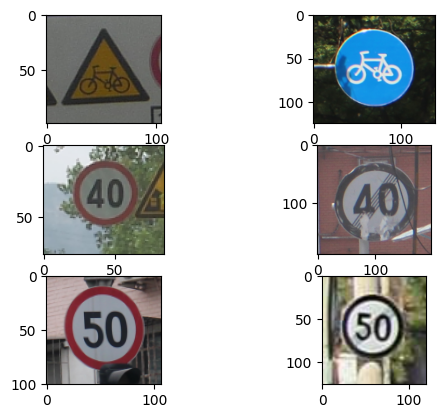

In [ ]:
plt.figure()
fig, axs = plt.subplots(3, 2)
img = mpimg.imread('/content/drive/MyDrive/traffic_Data/DATA/36/036_0001.png')
axs[0,0].imshow(img)
img = mpimg.imread('/content/drive/MyDrive/traffic_Data/DATA/30/030_0001.png')
axs[0,1].imshow(img)
img = mpimg.imread('/content/drive/MyDrive/traffic_Data/DATA/3/003_0001.png')
axs[1,0].imshow(img)
img = mpimg.imread('/content/drive/MyDrive/traffic_Data/DATA/18/018_0001.png')
axs[1,1].imshow(img)
img = mpimg.imread('/content/drive/MyDrive/traffic_Data/DATA/4/004_0001.png')
axs[2,0].imshow(img)
img = mpimg.imread('/content/drive/MyDrive/traffic_Data/DATA/19/019_0001.png')
axs[2,1].imshow(img)

plt.show()


In [ ]:
num_images.sort_values('count')[:10]

,label,count
7,speed limit (80km/h),2
26,keep Right,2
47,Train Crossing,2
39,Dangerous curve to the right,4
54,No stopping,4
57,Unknown8,6
30,Bicycles crossing,8
43,Go right or straight,8
51,Heavy Vehicle Accidents,8
19,Speed limit (50km/h),10


In [ ]:
datagen = ImageDataGenerator(rescale = 1.0/255, validation_split=0.5)

In [ ]:
BATCH_SIZE = 32
train_gen = datagen.flow_from_directory(data_dir, class_mode='categorical', subset='training', batch_size=BATCH_SIZE)
test_gen = datagen.flow_from_directory(data_dir, class_mode='categorical', subset='validation', batch_size=BATCH_SIZE, shuffle=False)

Found 2090 images belonging to 58 classes.
Found 2090 images belonging to 58 classes.


In [ ]:
train_images = train_gen.samples
test_images = test_gen.samples

print(train_images)

2090


In [ ]:
# check iterators are working
batchX, batchY = train_gen.next()
print('train batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
batchX, batchY = test_gen.next()
print('test batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
input_shape = batchX.shape[1:]

train batch shape=(32, 256, 256, 3), min=0.000, max=1.000
test batch shape=(32, 256, 256, 3), min=0.000, max=1.000


In [ ]:
import pandas as pd
from tensorflow.keras.applications import VGG16


In [ ]:
vgg16_obj = VGG16(include_top = False, input_shape = (256,256,3))    #  include_top = False is used to skip the layer from flattern
for layer in vgg16_obj.layers:             # Off the training of the trainable parameters
    layer.trainable = False
vgg16_obj.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
vgg16_obj.output

<KerasTensor: shape=(None, 8, 8, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten
f1 = Flatten()(vgg16_obj.output)
final_layer = Dense(58, activation='softmax')(f1)
final_layer

<KerasTensor: shape=(None, 58) dtype=float32 (created by layer 'dense_4')>

In [ ]:
model = Model(inputs=vgg16_obj.input,outputs=final_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_gen, validation_data= test_gen,epochs=2)

Epoch 1/2
66/66 [==============================] - 26s 376ms/step - loss: 2.9524 - accuracy: 0.6268 - val_loss: 0.6305 - val_accuracy: 0.8641
Epoch 2/2
66/66 [==============================] - 25s 381ms/step - loss: 0.3897 - accuracy: 0.9019 - val_loss: 0.3337 - val_accuracy: 0.9100


In [ ]:
model.save('Trafffic_sign_prediction-vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("Trafffic_sign_prediction-vgg16.h5")

In [ ]:
test_gen.reset()
raw_predictions = loaded_model.predict(test_gen)

66/66 [==============================] - 12s 181ms/step


In [ ]:
predictions = []
for item in raw_predictions:
    predictions.append(np.argmax(item))

In [ ]:
print(classification_report(test_gen.labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        35
           3       1.00      0.99      0.99        69
           4       1.00      0.98      0.99        48
           5       1.00      1.00      1.00        18
           6       1.00      0.95      0.98        64
           7       1.00      0.91      0.95        11
           8       1.00      1.00      1.00        71
           9       1.00      1.00      1.00        65
          10       1.00      1.00      1.00         4
          11       1.00      0.50      0.67         2
          12       1.00      0.78      0.87        40
          13       1.00      0.11      0.20         9
          14       1.00      1.00      1.00         6
          15       1.00      0.89      0.94         9
          16       1.00      0.86      0.92         7
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(test_gen.labels, predictions)

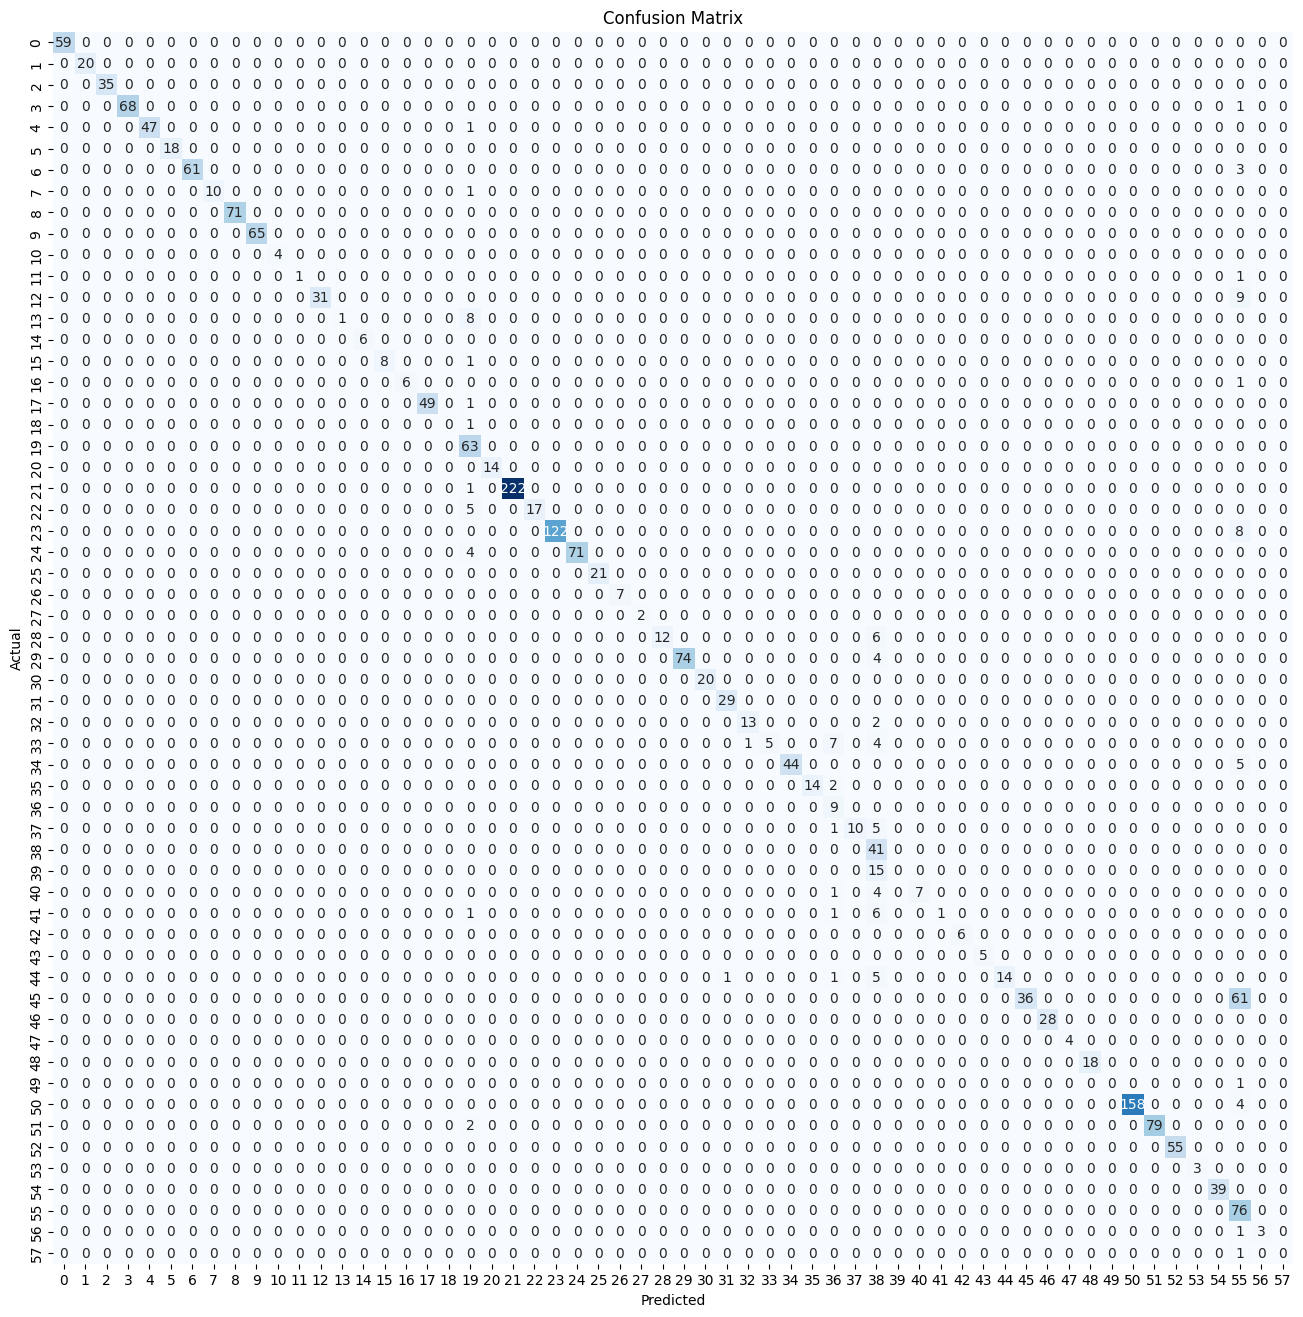

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ***Xception***


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
pretrained_base=Xception(include_top=False, input_shape = input_shape, pooling='avg', weights="imagenet")
pretrained_base.trainable=False
model = Sequential(
    [
    pretrained_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(len(class_names), activation='softmax')
    ]
)

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
print(model.summary())
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 58)                14906     
                                                                 
Total params: 21400930 (81.64 MB)
Trainable params: 539450 (2.06 MB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________
None


In [ ]:
callback= EarlyStopping(
  monitor="val_loss",
  min_delta=0.001,
  patience=5,
  restore_best_weights=True)

In [ ]:
hist = model.fit_generator(generator=train_gen, validation_data= test_gen, epochs=2)

<ipython-input-47-9b48ef964386>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator=train_gen, validation_data= test_gen, epochs=2)


Epoch 1/2
66/66 [==============================] - 32s 493ms/step - loss: 0.4375 - accuracy: 0.8971 - val_loss: 0.3150 - val_accuracy: 0.9273
Epoch 2/2
66/66 [==============================] - 25s 373ms/step - loss: 0.2623 - accuracy: 0.9431 - val_loss: 0.1610 - val_accuracy: 0.9789


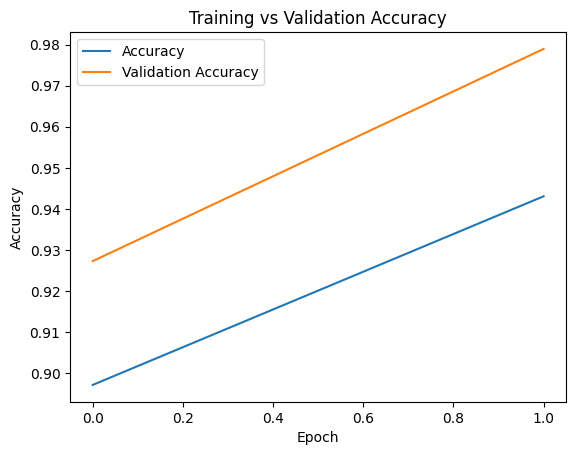

In [ ]:
# plot results
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(["Accuracy","Validation Accuracy"])

In [ ]:
model.save('Trafffic_sign_prediction-xception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_gen.reset()
raw_predictions = model.predict(test_gen)

66/66 [==============================] - 13s 191ms/step


In [ ]:
predictions = []
for item in raw_predictions:
    predictions.append(np.argmax(item))

In [ ]:
print(classification_report(test_gen.labels, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.90      0.95        20
           2       1.00      1.00      1.00        35
           3       1.00      0.96      0.98        69
           4       1.00      1.00      1.00        48
           5       1.00      0.89      0.94        18
           6       0.96      1.00      0.98        64
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00        71
           9       1.00      1.00      1.00        65
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00        40
          13       1.00      0.89      0.94         9
          14       1.00      1.00      1.00         6
          15       1.00      0.89      0.94         9
          16       1.00      1.00      1.00         7
          17       1.00    

In [ ]:
cm = confusion_matrix(test_gen.labels, predictions)

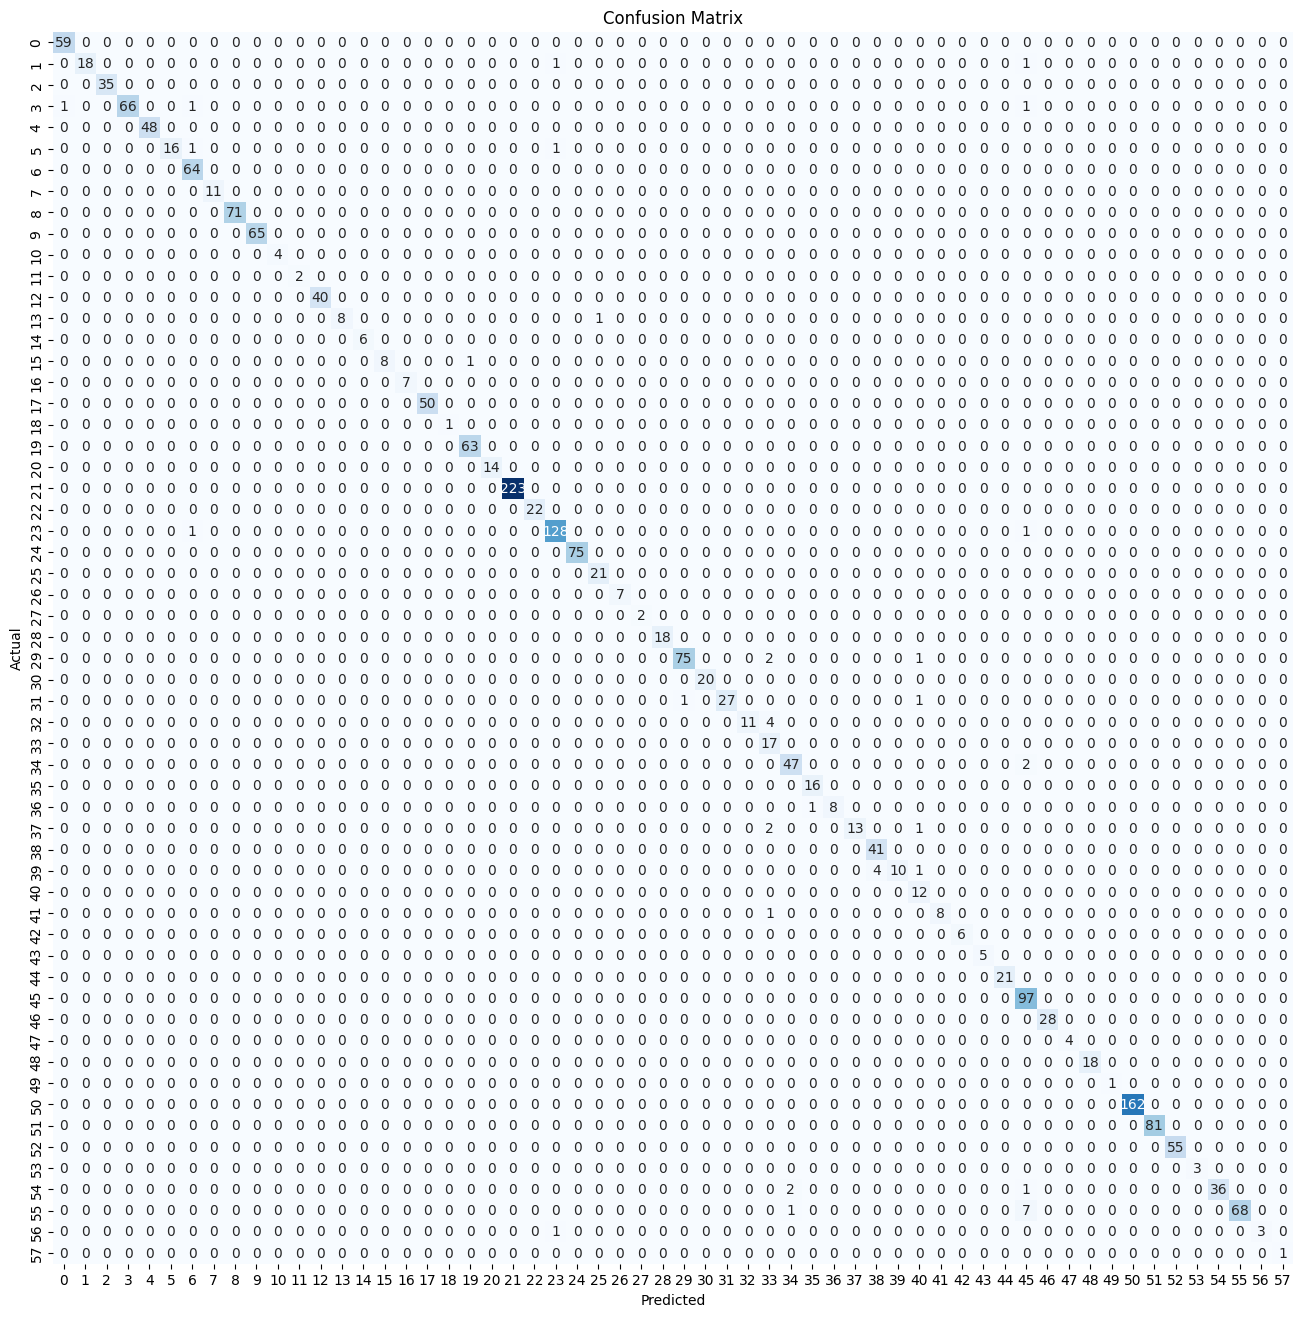

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()